# Lab 3

## W 203 Section 4

### James Wall, Jeya Seenivasagam, Derrick Hee

# Introduction

The purpose of this report is to explore the causes of crime in several counties in North Caroline. 

The main dependent variable explored throughout this report is **crime rate**. Every other variable can be considered an independent variable and will be considered as to whether it is a factor in any increase or decrease in crime rate.

We explore these variables with linear regression, specifically using the ordinary least squares method. We use hypothesis testing techniques to understand if any of our findings have statistical significance. We then look at whether there is any practical significance in our results.

Our goal is to use the findings in this report to inform policy recommendations for this political campaign.

# Exploratory Data Analysis

## Data cleaning

In [1]:
data_set = read.csv("crime_v2.csv")

First we will explore the structures of all of the variables in this study.

In [2]:
str(data_set)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

We note that we are working with 97 observations of 25 variables each. Most of the variables are numeric while there are a few categorical variables as well.

We note that the variable 'prbconv', which is intended to represent the probability of a conviction, is a Factor variable. We believe that this is an error, as probabilities are continuous and uncountably infinite and "Factor" variables are intended to represent a finite set of data.

Consequently, we elect to convert prbconv from a Factor to a numeric data type.

In [3]:
data_set$prbconv <- as.numeric(levels(data_set$prbconv))[data_set$prbconv]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


We now review the variables with the new prbconv.

In [4]:
str(data_set)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : num  0.528 1.481 0.268 0.525 0.477 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  335 300 238 282 291 ...
 $ wfed    : num 

We next look at the interesting facets of each variable (such as the mean and the median).

In [5]:
summary(data_set)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
    prbconv           prbpris           avgsen           polpc         
 Min.   :0.06838   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 1st Qu.:0.34541   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 Median :0.45283   Median :0.4234   Median : 9.100   Median :0.001485  
 Mean   :0.55128   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 3rd Qu.:0.58886   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 Max.   :2.12121   Max.   :0.600

In [6]:
#Remove rows with NA
#Method 1
data<-na.omit(data_set)
#method 2
data2<-data_set[!is.na(data_set),]

#Year is also not a useful data column as this dataset comes entirely from 1987 (Is there a need to remove or just leave be?)
summary(data)


     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
    prbconv           prbpris           avgsen           polpc          
 Min.   :0.06838   Min.   :0.1500   Min.   : 5.380   Min.   :0.0007459  
 1st Qu.:0.34541   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.0012308  
 Median :0.45283   Median :0.4234   Median : 9.100   Median :0.0014853  
 Mean   :0.55128   Mean   :0.4108   Mean   : 9.647   Mean   :0.0017022  
 3rd Qu.:0.58886   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.0018768  
 Max.   :2.12121   Max.   :0.6000   Max.   :20.700   Max.   :0.0090543  
    density         

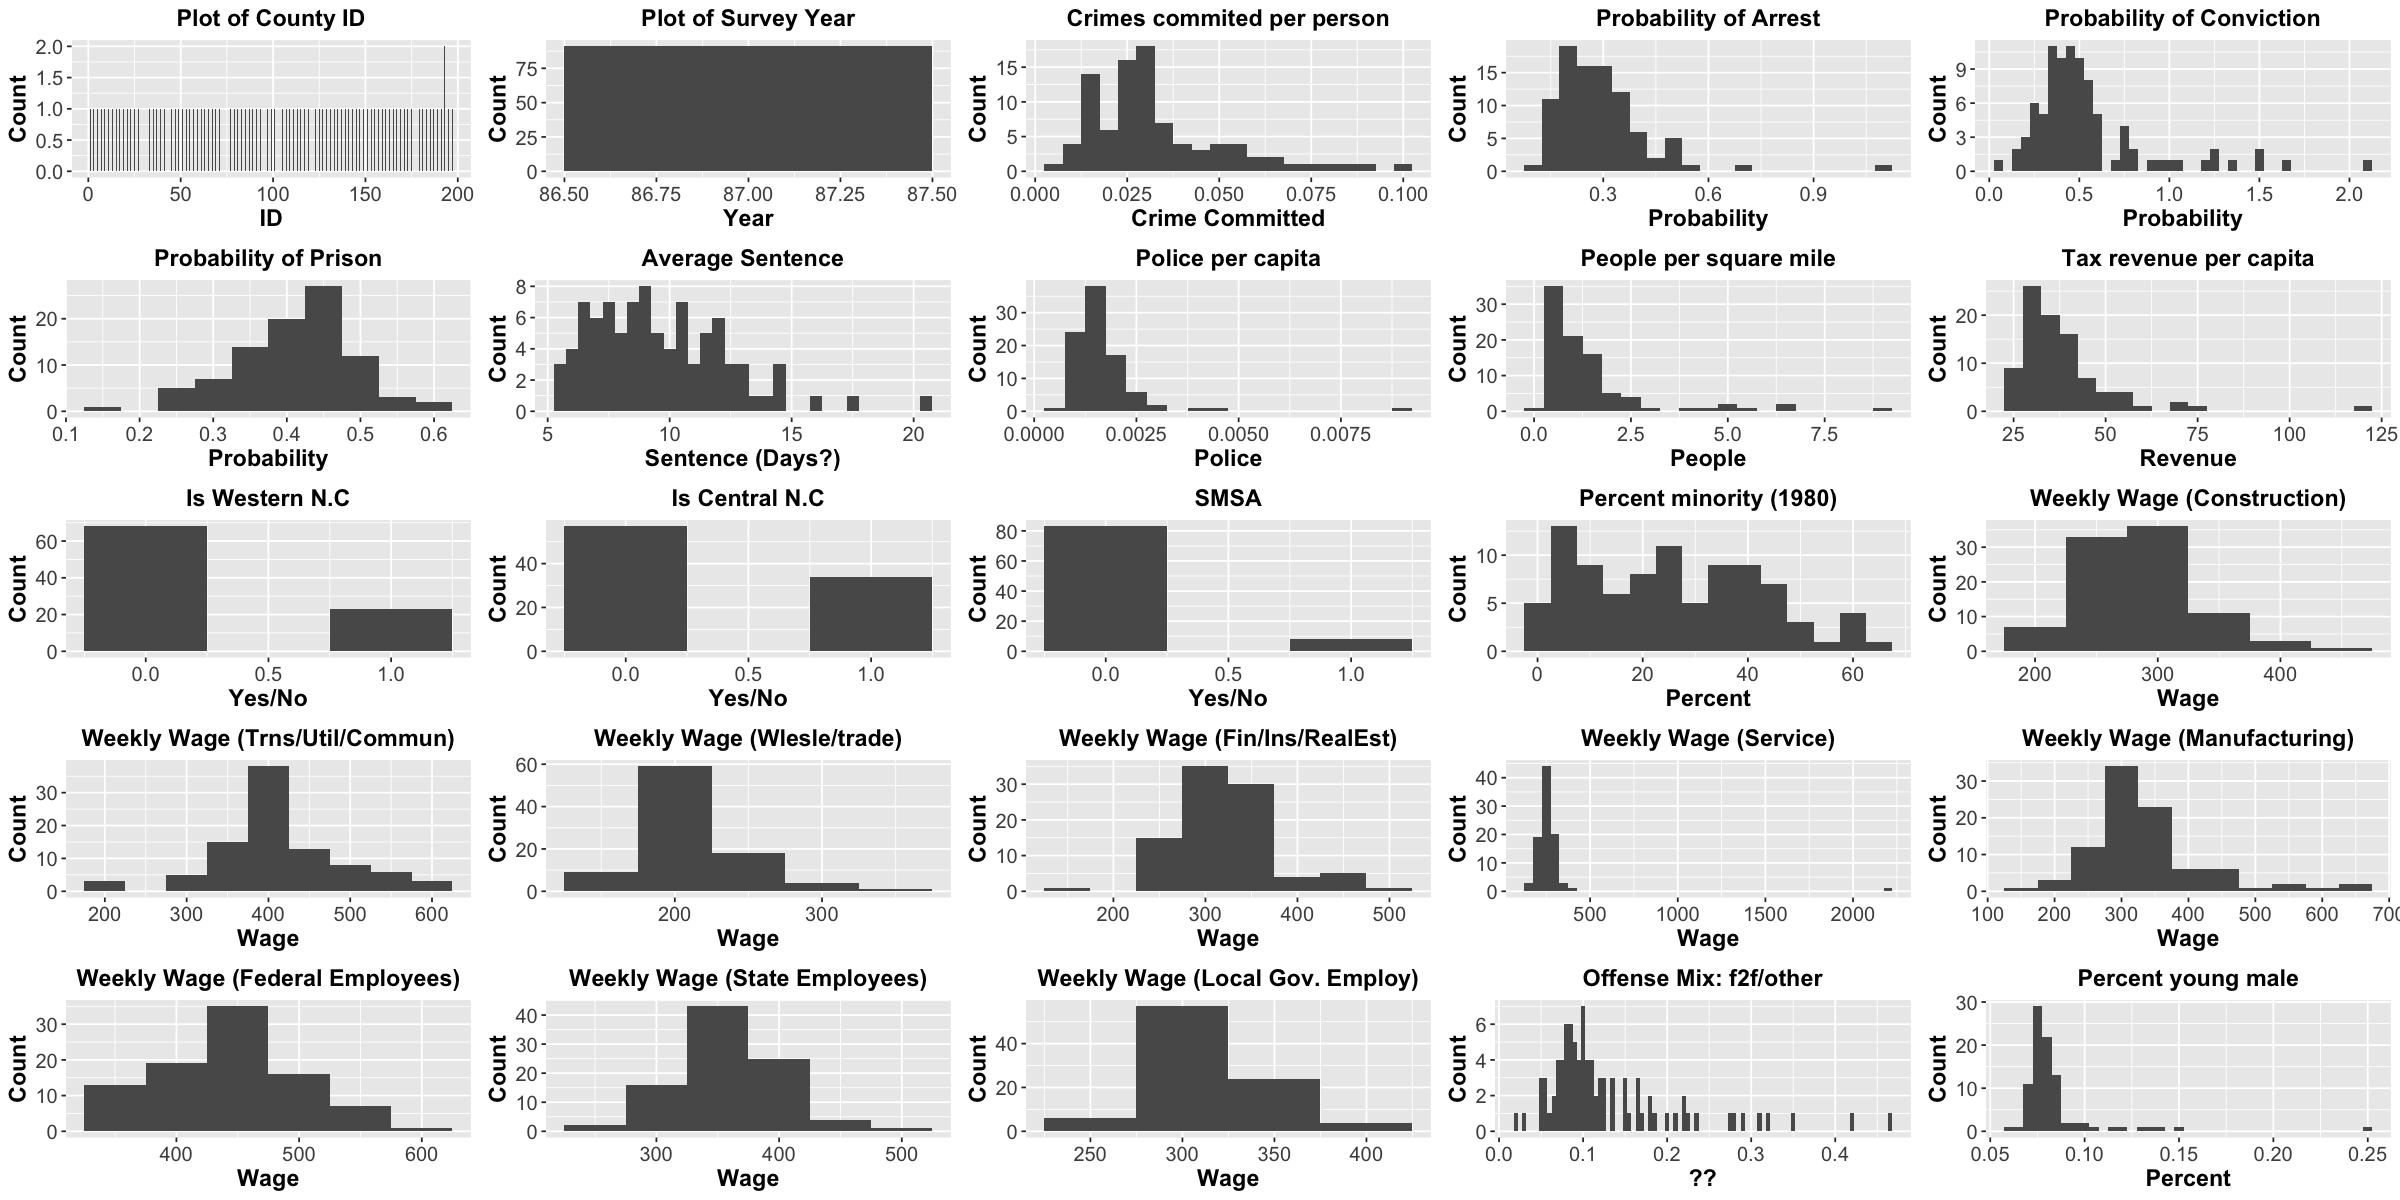

In [7]:
#Histogram of each of the variables, There is probably a better way to do this :)
#I know there is a way to use tidyr to make it use less lines (Next cell), but it seems to use the same Y axis scale
library(ggplot2)
library(gridExtra)

options(repr.plot.width=20, repr.plot.height=10)
p1<-ggplot(data=data, aes(data$county)) + geom_histogram(binwidth=0.5) + ggtitle("Plot of County ID") +
  xlab("ID") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p2<-ggplot(data=data, aes(data$year)) + geom_histogram(binwidth=1) + ggtitle("Plot of Survey Year") +
  xlab("Year") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p3<-ggplot(data=data, aes(data$crmrte)) + geom_histogram(binwidth=0.005) + ggtitle("Crimes commited per person") +
  xlab("Crime Committed") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p4<-ggplot(data=data, aes(data$prbarr)) + geom_histogram(binwidth=0.05) + ggtitle("Probability of Arrest") +
  xlab("Probability") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p5<-ggplot(data=data, aes(data$prbconv)) + geom_histogram(binwidth=0.05) + ggtitle("Probability of Conviction") +
  xlab("Probability") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p6<-ggplot(data=data, aes(data$prbpris)) + geom_histogram(binwidth=0.05) + ggtitle("Probability of Prison") +
  xlab("Probability") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p7<-ggplot(data=data, aes(data$avgsen)) + geom_histogram(binwidth=0.5) + ggtitle("Average Sentence") +
  xlab("Sentence (Days?)") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p8<-ggplot(data=data, aes(data$polpc)) + geom_histogram(binwidth=0.0005) + ggtitle("Police per capita") +
  xlab("Police") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p9<-ggplot(data=data, aes(data$density)) + geom_histogram(binwidth=0.5) + ggtitle("People per square mile") +
  xlab("People") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p10<-ggplot(data=data, aes(data$taxpc)) + geom_histogram(binwidth=5) + ggtitle("Tax revenue per capita") +
  xlab("Revenue") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p11<-ggplot(data=data, aes(data$west)) + geom_histogram(binwidth=0.5) + ggtitle("Is Western N.C") +
  xlab("Yes/No") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p12<-ggplot(data=data, aes(data$central)) + geom_histogram(binwidth=0.5) + ggtitle("Is Central N.C") +
  xlab("Yes/No") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p13<-ggplot(data=data, aes(data$urban)) + geom_histogram(binwidth=0.5) + ggtitle("SMSA") +
  xlab("Yes/No") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p14<-ggplot(data=data, aes(data$pctmin80)) + geom_histogram(binwidth=5) + ggtitle("Percent minority (1980)") +
  xlab("Percent") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p15<-ggplot(data=data, aes(data$wcon)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Construction)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p16<-ggplot(data=data, aes(data$wtuc)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Trns/Util/Commun)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p17<-ggplot(data=data, aes(data$wtrd)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Wlesle/trade)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p18<-ggplot(data=data, aes(data$wfir)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Fin/Ins/RealEst)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p19<-ggplot(data=data, aes(data$wser)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Service)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p20<-ggplot(data=data, aes(data$wmfg)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Manufacturing)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p21<-ggplot(data=data, aes(data$wfed)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Federal Employees)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p22<-ggplot(data=data, aes(data$wsta)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (State Employees)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p23<-ggplot(data=data, aes(data$wloc)) + geom_histogram(binwidth=50) + ggtitle("Weekly Wage (Local Gov. Employ)") +
  xlab("Wage") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p24<-ggplot(data=data, aes(data$mix)) + geom_histogram(binwidth=0.005) + ggtitle("Offense Mix: f2f/other") +
  xlab("??") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

p25<-ggplot(data=data, aes(data$pctymle)) + geom_histogram(binwidth=0.005) + ggtitle("Percent young male") +
  xlab("Percent") + ylab("Count") + 
  theme(plot.title = element_text(hjust = 0.5,size=14,face="bold"),axis.text=element_text(size=12), axis.title=element_text(size=14,face="bold")) 

grid.arrange(p1, p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25, ncol = 5)


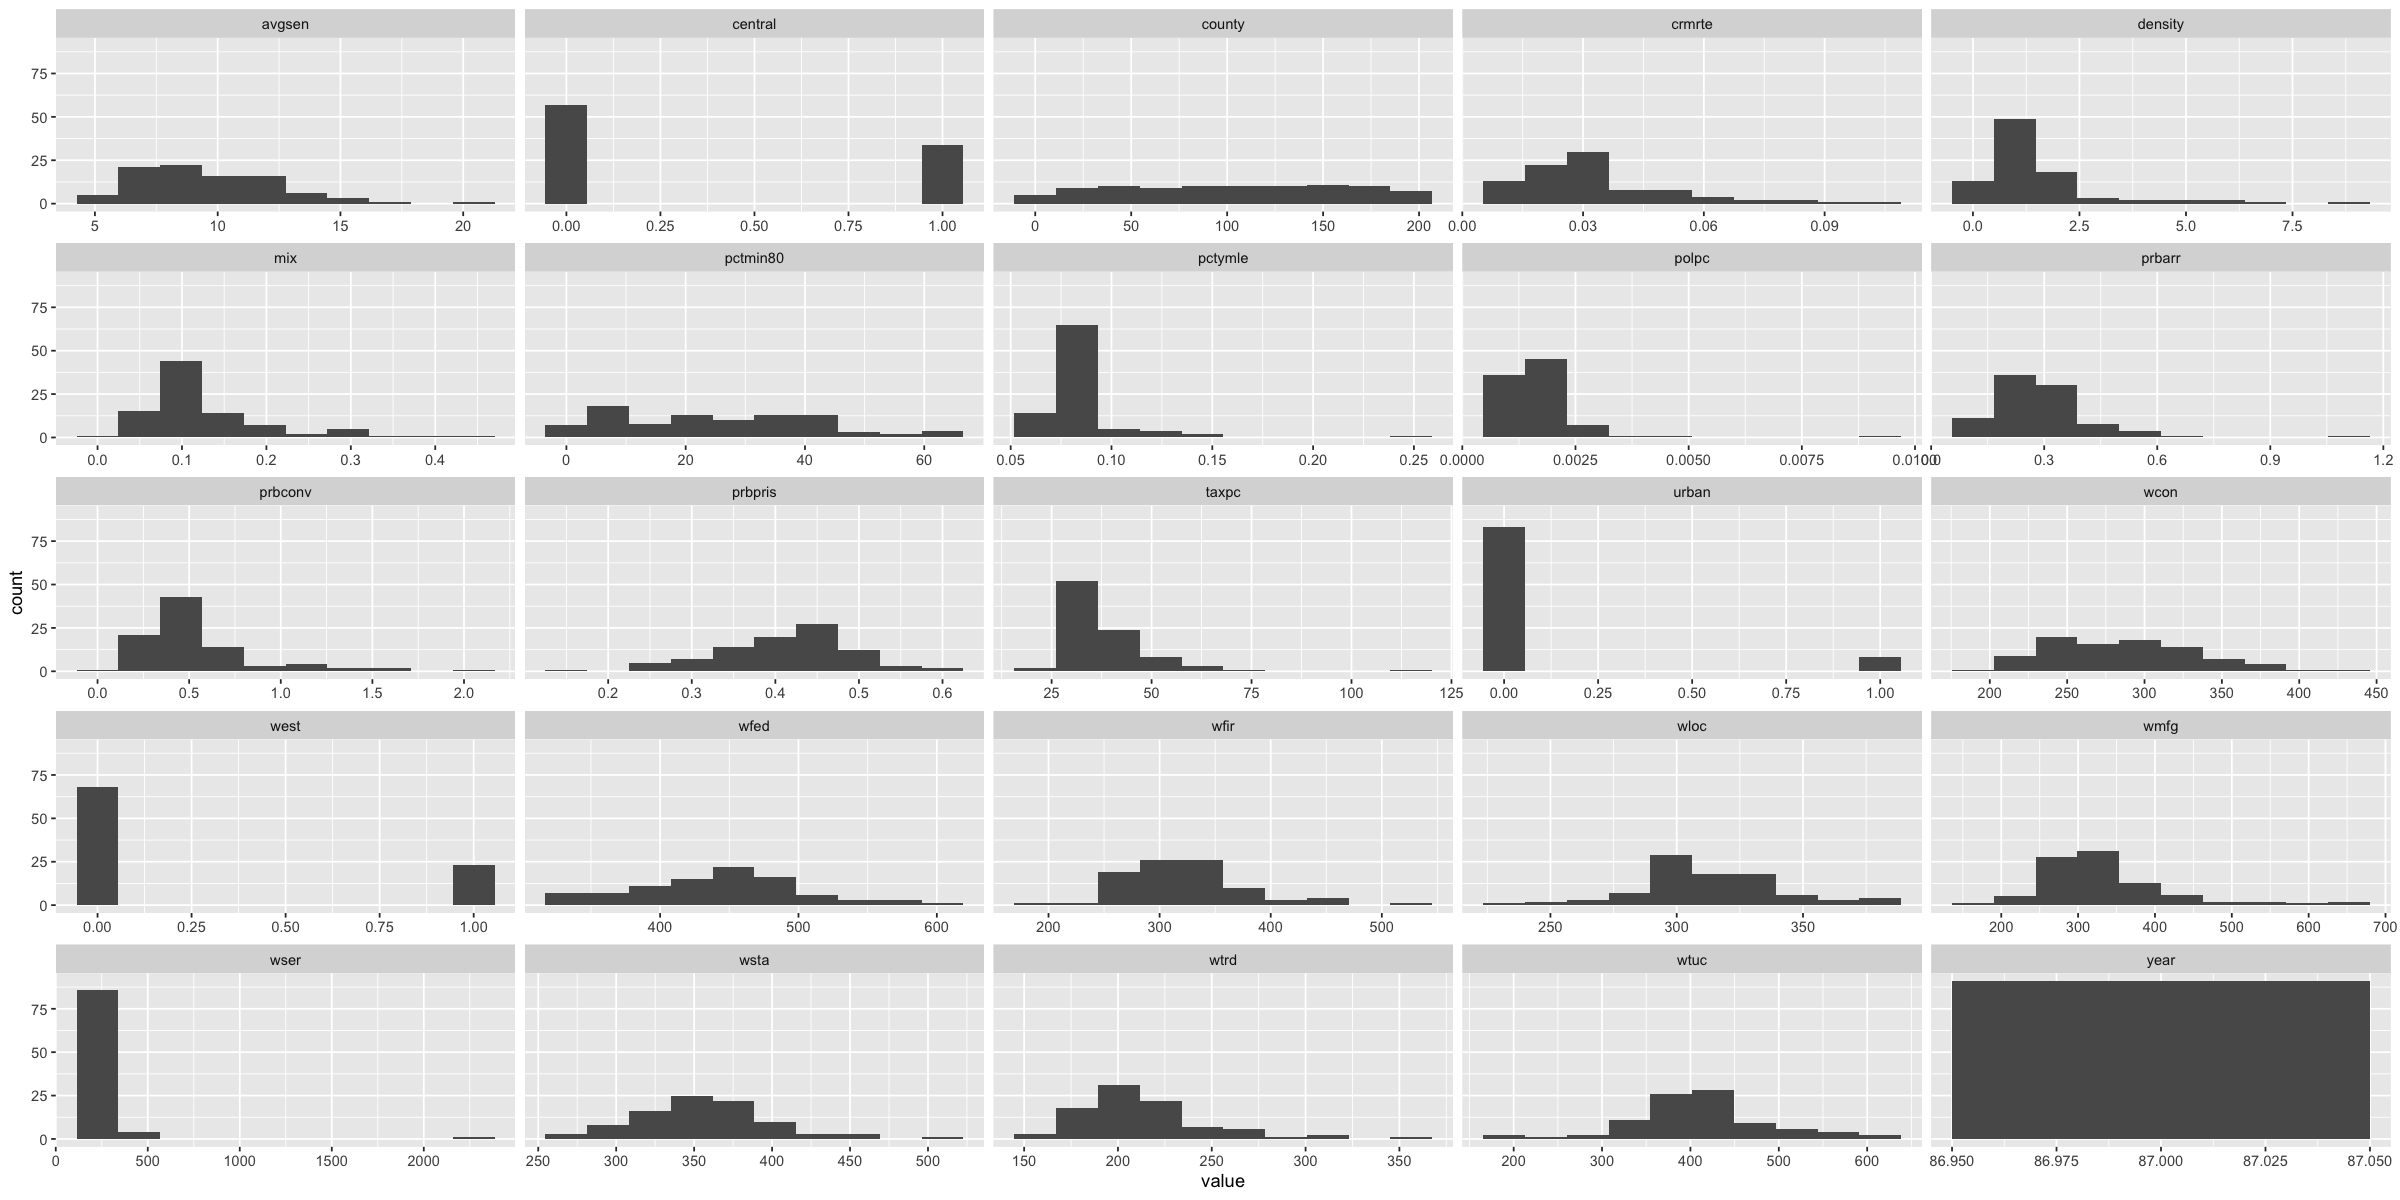

In [8]:
library(tidyr)
ggplot(gather(data), aes(value)) + 
    geom_histogram(bins = 10) + 
    facet_wrap(~key, scales = 'free_x')

In [ ]:
library(reshape2)

res<-cor(data)
res<-round(res,2)

melted_res <- melt(res)
head(res)

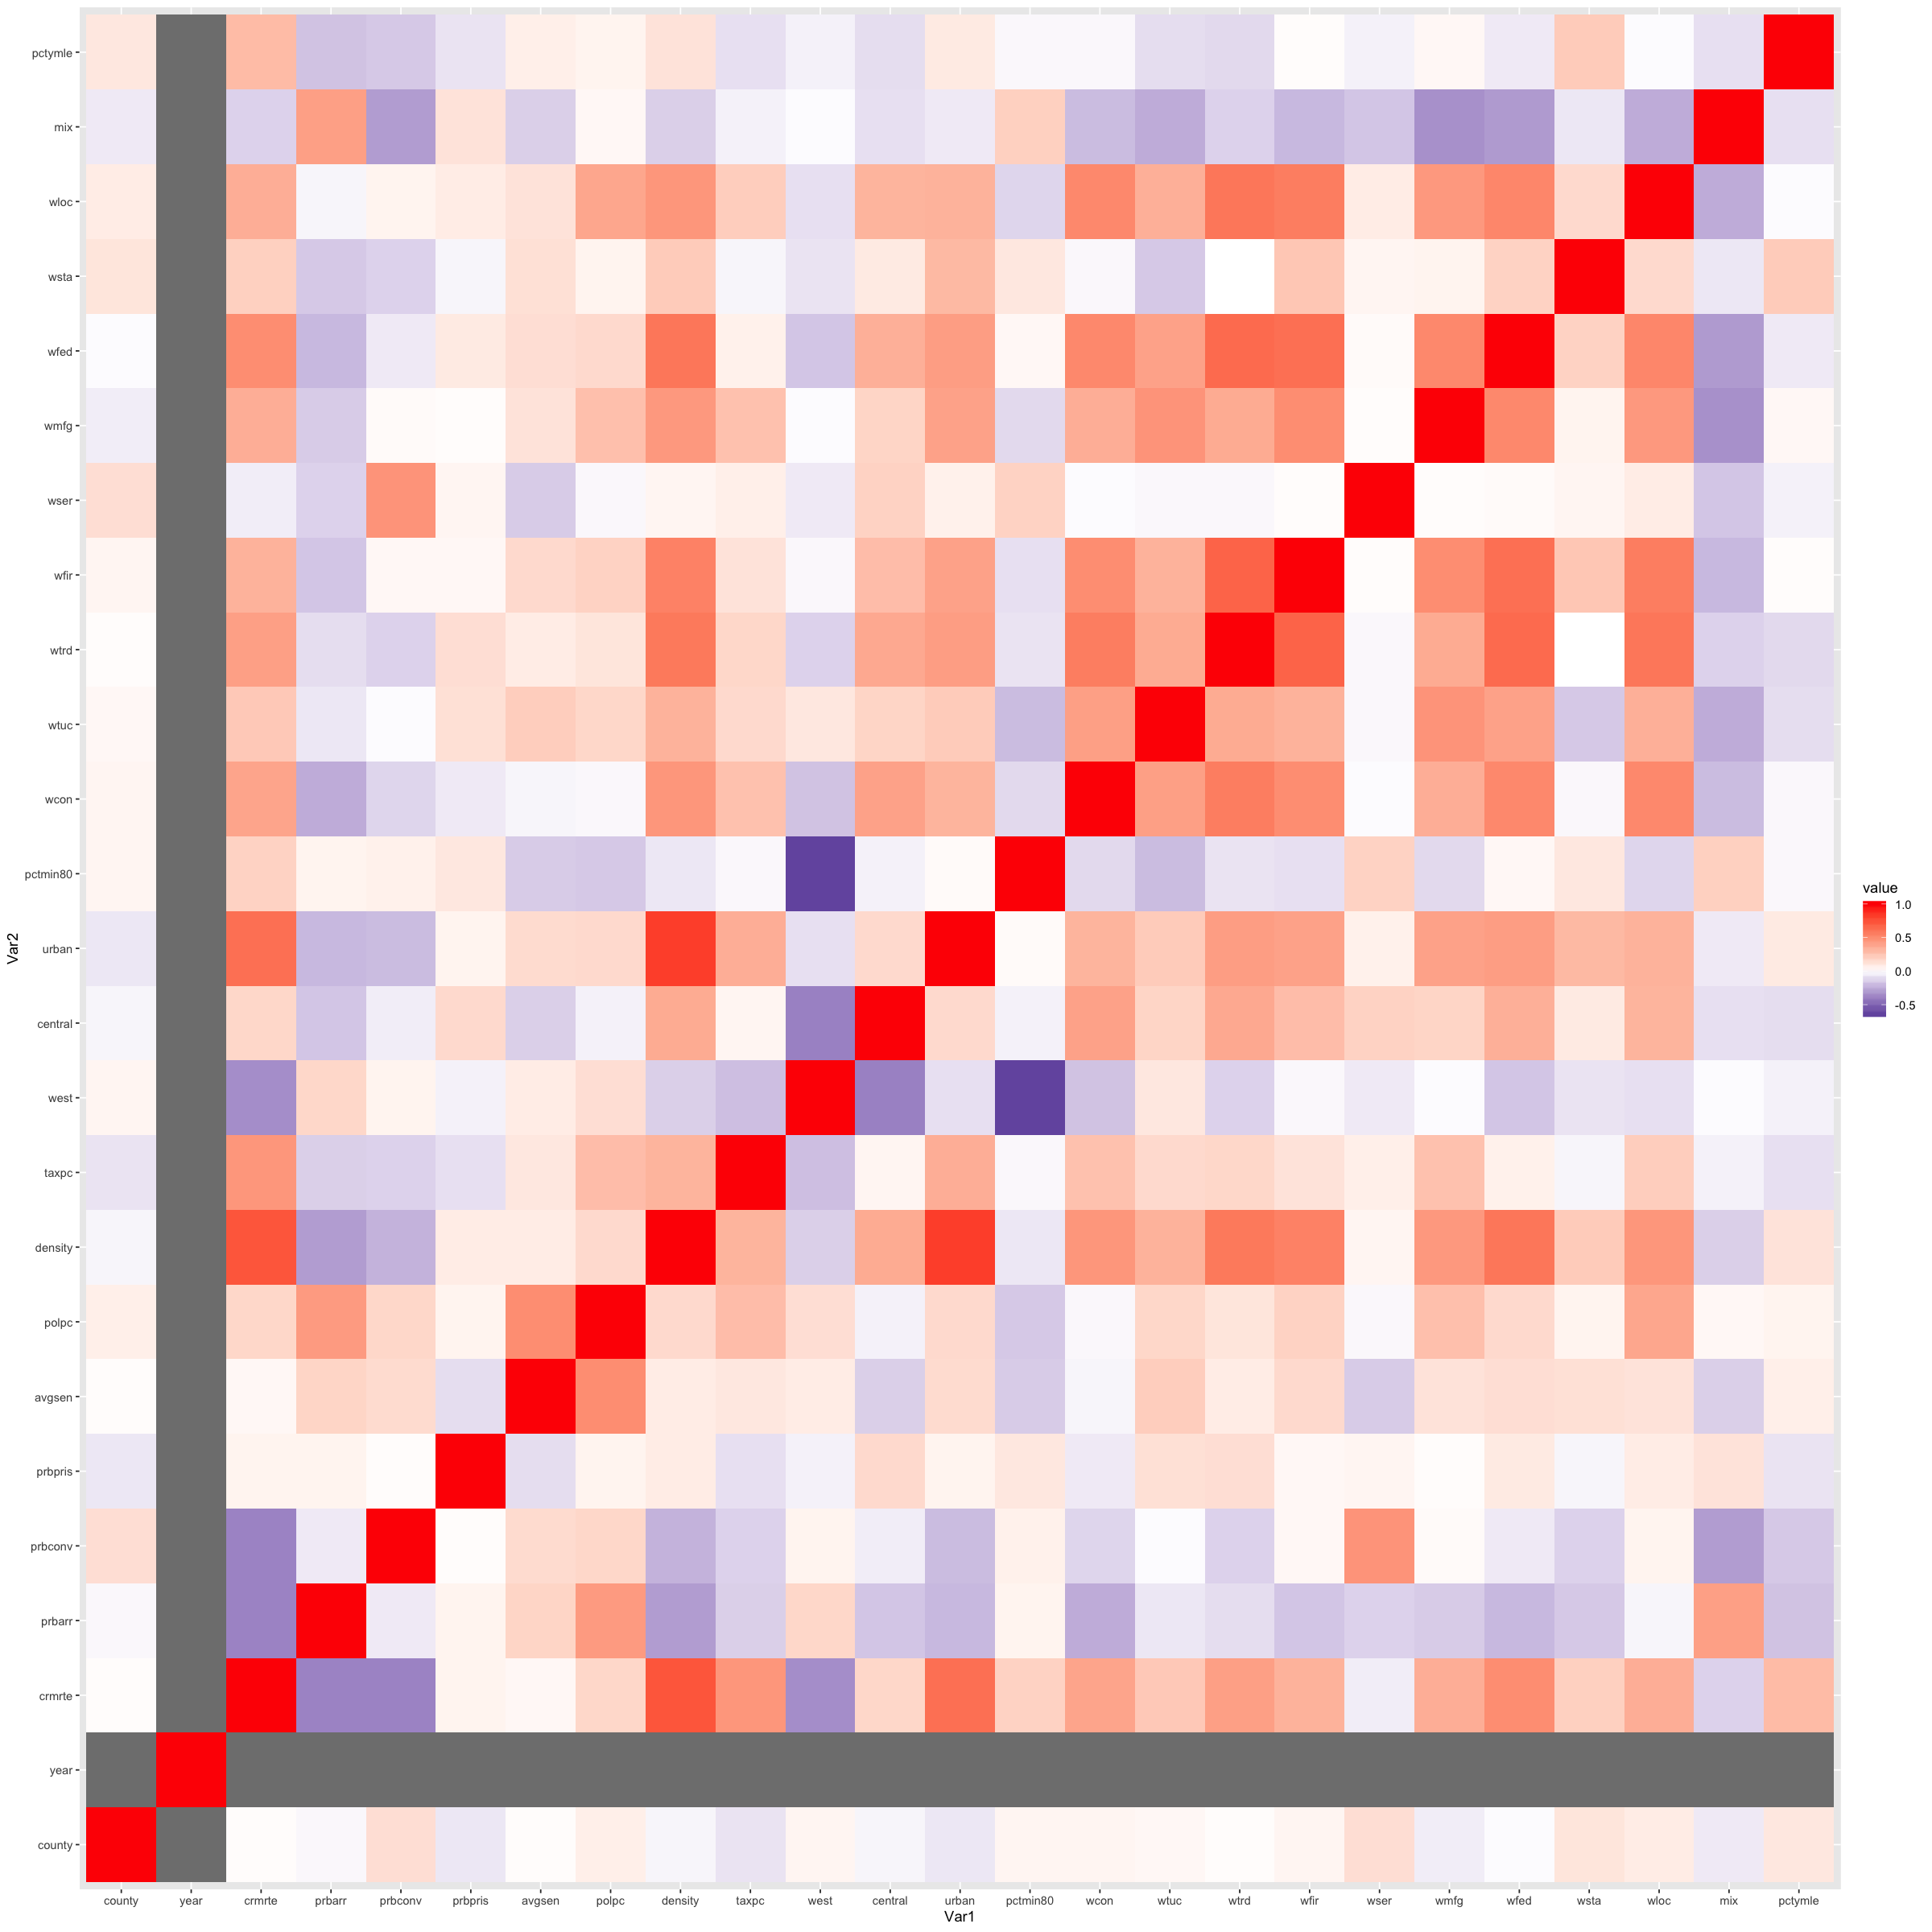

In [11]:
options(repr.plot.width=20, repr.plot.height=20)
ggplot(data = melted_res, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile()+scale_fill_gradient2(low="navy", mid="white", high="red", 
                       midpoint=0, limits=range(melted_res$value))

then note . It should be
noted that there are 100 counties in North Carolina; therefore this dataset contains data for 91% of them. It is not possible to
tell if the excluded counties are randomly excluded or share specific features that may bias this data set.

TODO: Eliminate all missing data based on county

In [10]:
#Eliminate data by reassigning index to county.
#I am assuming you mean replace rowname with appropriate county number. 
#193 is a duplicated data row
data$county[duplicated(data$county)]
data[data$county==193,]
#We see that all the data is the same
all(data[88,]==data[89,])
#Therefore we remove this duplicated entry
data<-data[-c(89),]

[1] 193

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
88,193,87,0.0235277,0.266055,0.588859,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394
89,193,87,0.0235277,0.266055,0.588859,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


[1] TRUE

In [12]:
#Remove column "County" and apply it to row.names instead
data.indexed <- data.frame(data[,-1], row.names=data[,1])
head(data.indexed)

,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,87,0.0356036,0.298270,0.5275960,0.436170,6.71,0.00182786,2.4226327,30.99368,0,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.4814800,0.450000,6.35,0.00074588,1.0463320,26.89208,0,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.2678570,0.600000,6.76,0.00123431,0.4127659,34.81605,1,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.5254240,0.435484,7.14,0.00152994,0.4915572,42.94759,0,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.4765630,0.442623,8.22,0.00086018,0.5469484,28.05474,1,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.0683761,0.500000,13.00,0.00288203,0.6113361,35.22974,1,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


MAYBE DELETE?

We note that two of the variables that are intended to represent probabilities (prbarr and prbconv) have maximum values greater than 1. We feel comforable assuming that the entries greater than 1 must be in error, as probabilities must lie in between 0 and 1.

To be safe, we remove all rows where the value of any of our probability variables (prbpris, prbarr, and prconv) is greater than 1.

### From Lab3 suggestions:
Here are some things to keep in mind during your model building process:

1. What do you want to measure?  Make sure you identify variables that will be relevant to the concerns of the political campaign.

It should be something that can be addressed in the political campaign, something that can feasibly be changed

SMSA = Standard Metropolitan Statistics Area?

variable  | label | Changeable?
----------|-----------------------------------|--------------------------
1    county|               county identifier|  No
2      year|                            1987|  No
3    crmrte|     crimes committed per person|  (Target?)
4    prbarr|         'probability' of arrest|  (Target?)
5   prbconv|     'probability' of conviction|  (Target?)
6   prbpris| 'probability' of prison sentence| (Target?)
7    avgsen|             avg. sentence, days|  Yes
8     polpc|               police per capita|  Yes
9   density|             people per sq. mile|  No
10    taxpc|          tax revenue per capita|  Yes
11     west|           =1 if in western N.C.|  No
12  central|           =1 if in central N.C.|  No
13    urban|                   =1 if in SMSA|  Possibly yes?
14 pctmin80|            perc. minority, 1980|  No
15     wcon|       weekly wage, construction|  Yes
16     wtuc|    wkly wge, trns, util, commun|  Yes
17     wtrd| wkly wge, whlesle, retail trade|  Yes
18     wfir|    wkly wge, fin, ins, real est|  Yes
19     wser|      wkly wge, service industry|  Yes
20     wmfg|         wkly wge, manufacturing|  Yes
21     wfed|         wkly wge, fed employees|  Yes
22     wsta|       wkly wge, state employees|  Yes
23     wloc|        wkly wge, local gov emps|  Yes
24      mix| offense mix: face-to-face/other|  (Not entirely sure what this is)
25  pctymle|              percent young male|  No

I am assuming that we cannot just change the population of people living in each county like Hitler or something, so I have marked `density`|`pctymle`|`pctmin80` as not really changeable

Similarly, physical location isn't really something we can change, so `west`|`central`| are marked No. 

I marked `urban` as possibly yes because SMSA classification might be changeable based on "high degree of social and economic integration with the core as measured by commuting ties" ([Wikipedia](https://en.wikipedia.org/wiki/List_of_metropolitan_statistical_areas)). I think that this would make for a good model.

2. What covariates help you identify a causal effect?  What covariates are problematic, either due to multicollinearity, or because they will absorb some of a causal effect you want to measure?

* People per square mile (density) and police per capita (polpc) will influence the number of arrests made in each county. Depending on how probability of arrest is determined, this may affect that value.
* 

3. What transformations should you apply to each variable?  This is very important because transformations can reveal linearities in the data, make our results relevant, or help us meet model assumptions.

4. Are your choices supported by EDA?  You will likely start with some general EDA to detect anomalies (missing values, top-coded variables, etc.).  From then on, your EDA should be interspersed with your model building.  Use visual tools to guide your decisions.

# Model Specification #1

DELETE THIS CELL LATER

This model will be this one:
- One model with only the explanatory variables of key interest (possibly transformed, as
determined by your EDA), and no other covariates.

Here are some things to keep in mind during your model building process:
1. What do you want to measure? Make sure you identify variables that will be relevant to the
concerns of the political campaign.
2. What covariates help you identify a causal effect? What covariates are problematic, either
due to multicollinearity, or because they will absorb some of a causal effect you want to
measure?
3. What transformations should you apply to each variable? This is very important because
transformations can reveal linearities in the data, make our results relevant, or help us meet
model assumptions.
4. Are your choices supported by EDA? You will likely start with some general EDA to detect
anomalies (missing values, top-coded variables, etc.). From then on, your EDA should be
interspersed with your model building. Use visual tools to guide your decisions.


$Y = aX_o +b$

Crimes committed per person = a(urban)+b?

DELETE THIS CELL LATER

This model will be this one:
• One model that includes key explanatory variables and only covariates that you believe
increase the accuracy of your results without introducing substantial bias (for example, you
should not include outcome variables that will absorb some of the causal effect you are
interested in). This model should strike a balance between accuracy and parsimony and
reflect your best understanding of the determinants of crime.

Here are some things to keep in mind during your model building process:
1. What do you want to measure? Make sure you identify variables that will be relevant to the
concerns of the political campaign.
2. What covariates help you identify a causal effect? What covariates are problematic, either
due to multicollinearity, or because they will absorb some of a causal effect you want to
measure?
3. What transformations should you apply to each variable? This is very important because
transformations can reveal linearities in the data, make our results relevant, or help us meet
model assumptions.
4. Are your choices supported by EDA? You will likely start with some general EDA to detect
anomalies (missing values, top-coded variables, etc.). From then on, your EDA should be
interspersed with your model building. Use visual tools to guide your decisions.


$Y = aX_o +b+Z_0+...+Z_n$

# Model Specification #3

DELETE THIS CELL LATER

This model will be this one:
• One model that includes the previous covariates, and most, if not all, other covariates. A key
purpose of this model is to demonstrate the robustness of your results to model specification.

Here are some things to keep in mind during your model building process:
1. What do you want to measure? Make sure you identify variables that will be relevant to the
concerns of the political campaign.
2. What covariates help you identify a causal effect? What covariates are problematic, either
due to multicollinearity, or because they will absorb some of a causal effect you want to
measure?
3. What transformations should you apply to each variable? This is very important because
transformations can reveal linearities in the data, make our results relevant, or help us meet
model assumptions.
4. Are your choices supported by EDA? You will likely start with some general EDA to detect
anomalies (missing values, top-coded variables, etc.). From then on, your EDA should be
interspersed with your model building. Use visual tools to guide your decisions.


# Regression Table

DELETE THIS CELL LATER

Your report will include a model building process, culminating in a well formatted regression table that displays a minimum of three model specifications.

You should display all of your model specifications in a regression table, using a package like stargazer to format your output. It should be easy for the reader to find the coefficients that represent key effects near the top of the regression table, and scan horizontally to see how they change from specification to specification. Since we won’t cover inference for linear regression until unit 12, you should not display any standard errors at this point. You should also avoid conducting statistical tests for now (but please do point out what tests you think would be valuable)

# Residual Analysis

# Omitted variables discussion

DELETE THIS CELL LATER

The data is provided in a file, crime_v2.csv. While we are only providing you with a single cross-section of
data, the original study was based on a multi-year panel. The authors used panel data methods
and instrumental variables to control for some types of omitted variables. 

Since you are restricted to ordinary least squares regression, omitted variables will be a major obstacle to your estimates.

You should aim for causal estimates, while clearly explaining how you think omitted variables
may affect your conclusions.

After your model building process, you should include a substantial discussion of omitted
variables. Identify what you think are the 5-10 most important omitted variables that bias results
you care about. For each variable, you should estimate what direction the bias is in. If you can
argue whether the bias is large or small, that is even better. State whether you have any variables
available that may proxy (even imperfectly) for the omitted variable. Pay particular attention to
whether each omitted variable bias is towards zero or away from zero. You will use this information to judge whether the effects you find are likely to be real, or whether they might be entirely
an artifact of omitted variable bias.

# Conclusion